# Importing Libraries::

In [6]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import random

# Importing Dataset::

In [7]:
#File loading
d = pd.read_csv('/home/kuku/Documents/train.csv').as_matrix()

random.shuffle(d)

#Training data::
x_train = d[:39000,1:]
x_train = np.array(x_train)
x_train = x_train.T

"""x_avg = np.sum(x_train, axis=0, keepdims=True)/786
x_train = x_train.astype(float)
x_train -= x_avg
x_sig = x_train**2
x_sig = np.sum(x_sig, axis=0, keepdims=True)/786
x_train /= x_sig"""
print(x_train.shape)

y_train = d[:39000,0]
y_train = np.array([y_train])
#print(y_train.shape)

#Testing data::
x_test = d[39000:,1:]
x_test = np.array(x_test)
x_test = x_test.T

"""x_avg = np.sum(x_test, axis=0, keepdims=True)/786
x_test = x_test.astype(float)
x_test -= x_avg
x_sig = x_test**2
x_sig = np.sum(x_sig, axis=0, keepdims=True)/786
x_test /= x_sig"""
print(x_test.shape)

y_test = d[39000:,0]
y_test = np.array([y_test])
print(y_test.shape)


/home/kuku/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(784, 39000)
(784, 3000)
(1, 3000)


# Class neuralnet::

In [8]:
class neuralnet:
    
    # Intializing parameters::
    def __init__(self, layer_dims):
        self.para = {}
        l = len(layer_dims)
        for i in range(1,l):
            self.para["w"+str(i)] = np.random.randn(layer_dims[i],layer_dims[i-1]) * 0.01
            self.para["b"+str(i)] = np.zeros((layer_dims[i],1))
    
    
    
    #training::
    def train(self, acti_type, epochs, alpha_o, batch_size, no_of_batches):
        self.acti = {}
        self.z = {}
        tic = time.time()
        jwb = []
        itr = []
        ctr = 1
        for p in range(epochs):

            alpha = (1/(1+(1*p)))*alpha_o
            #alpha = (0.95**p)*alpha_o

            for i in range(1,no_of_batches+1):

                #Taking mini batches::
                self.acti = {'a0' : x_train[:,((i-1)*1000):(i*1000)]}
                y_mini = np.array(y_train[:,((i-1)*1000):(i*1000)])


                # for prop::
                l = len(acti_type)
                for j in range(1,l+1):
                    self.z['z'+str(j)] = np.dot(self.para['w'+str(j)],self.acti['a'+str(j-1)]) + self.para['b'+str(j)]
                    #activate::
                    if acti_type[j-1]== "tanh":
                        self.acti['a'+str(j)] = tanh(self.z["z"+str(j)])
                    elif acti_type[j-1]== "softmax":
                        self.acti['a'+str(j)] = self.softmax(self.z["z"+str(j)])
                    elif acti_type[j-1]== "relu":
                        self.acti['a'+str(j)] = self.relu(self.z["z"+str(j)])
                    elif acti_type[j-1]== "sigmoid":
                        self.acti['a'+str(j)] = self.sigmoid(self.z["z"+str(j)])

                    """#Normalizing ::
                    if(j!=l):
                        acti_avg = np.sum(acti['a'+str(j)], axis=0, keepdims=True)/acti['a'+str(j)].shape[0]
                        acti['a'+str(j)] -= acti_avg
                        acti_sig = acti['a'+str(j)]**2
                        acti_sig = np.sum(acti_sig , axis=0, keepdims=True)/acti['a'+str(j)].shape[0]
                        acti['a'+str(j)] /= acti_sig"""

                    #self.acti['a'+str(j)] = self.dropout(self.acti['a'+str(j)], 0.8)

                #calculating Cost Function::    
                lost = np.array(self.acti['a'+str(l)] + 0.01)
                lost = np.log(lost)
                li = 0
                for i in range(batch_size):
                    li += -lost[y_mini[0,i],i]
                jwb.append(li/batch_size)
                itr.append(ctr)
                ctr+=1

                #back prop for last layer:: 
                dz ={}
                dz[str(l)] = self.acti['a'+str(l)]
                for k in range(batch_size):
                    dz[str(l)][y_mini[0,k],k] -= 1
                dw = np.dot(dz[str(l)], self.acti['a'+str(l-1)].T)/batch_size
                db = np.sum(dz[str(l)], axis=1, keepdims = True)/batch_size
                self.para['w'+str(l)] = self.para['w'+str(l)] - (alpha*dw)
                self.para['b'+str(l)] = self.para['b'+str(l)] - (alpha*db)

                #back prop for other layers::
                for k in range(l-1,0,-1):
                    if acti_type[k-1]=='tanh': g = self.tanh(self.z['z'+str(k)],True)
                    elif acti_type[k-1]=='relu': g = self.relu(self.z['z'+str(k)],True)
                    elif acti_type[k-1]=='sigmoid': g = self.sigmoid(self.z['z'+str(k)],True)
                    #calculating Derivatives::

                    dz[str(k)] = (np.dot(self.para['w'+str(k+1)].T, dz[str(k+1)]) * g)  #KUKU_ERROR

                    dw1 = np.dot(dz[str(k)], self.acti['a'+str(k-1)].T)/batch_size   #KUKU_ERROR
                    db1 = np.sum(dz[str(k)], axis=1, keepdims = True)/batch_size
                    #Gradient dececnt::
                    self.para['w'+str(k)] = self.para['w'+str(k)] - (alpha*dw1)
                    self.para['b'+str(k)] = self.para['b'+str(k)] - (alpha*db1)
        toc = time.time()
        print("training time: "+str((toc-tic)/60)+" min")

        # Plotting::
        #print(jwb)
        #plt.xlim(xmax = 390)
        #plt.xlim(xmin = 1)
        plt.figure(figsize=(18, 9))
        plt.xlabel("ith iteration", fontsize=22)
        plt.ylabel("Cost", fontsize=22)
        plt.plot(itr, jwb, "ro")
        plt.plot(itr, jwb)
        
    
    
    
    #testing::            
    def test(self, acti_type, test_no):
        accuracy_score = 0
        for i in range(test_no):
            l = len(acti_type)
            x = x_test[:,i]
            x = np.array([x])
            z_test = {}
            acti_test = { 'a0':x}
            for j in range(1,l+1):
                z_test['z'+str(j)] = np.dot(acti_test['a'+str(j-1)], self.para['w'+str(j)].T) + self.para['b'+str(j)].T
                #activate::
                if acti_type[j-1]== "tanh":
                    acti_test['a'+str(j)] = self.tanh(z_test["z"+str(j)])
                elif acti_type[j-1]== "softmax":
                    acti_test['a'+str(j)] = self.softmax_test(z_test["z"+str(j)])
                elif acti_type[j-1]== "relu":
                    acti_test['a'+str(j)] = self.relu(z_test["z"+str(j)])
                elif acti_type[j-1]== "sigmoid":
                    acti_test['a'+str(j)] = self.sigmoid(z_test["z"+str(j)]) 
            q = -1
            ans=0
            for j in range(10):
                #print(acti_test['a'+str(l)][0,j])
                if q < acti_test['a'+str(l)][0,j]: 
                    q = acti_test['a'+str(l)][0,j]
                    ans=j
            if ans==y_test[0,i]: accuracy_score+=1
            #print(ans)    
            #plt.imshow(x.reshape(28,28), 'gray')    

        print("Accuracy: "+str((accuracy_score/test_no)*100)+" %")
        print(1000-accuracy_score)
        
    
    
    # Dropout regularization::
    def dropout(self, activation, keep_prob):
        do = np.random.rand(activation.shape[0], activation.shape[1]) < keep_prob
        activation *= do
        activation /= keep_prob
        return activation
    
    
    #Activation Functions::
    def tanh(self, x, derivative=False):
        if (derivative == True):
            return (1 - (x ** 2))
        return 1.7159 * np.tanh(x*0.6666)
    
    
    def softmax(self, x):
        """Compute softmax values for each sets of scores in x."""
        e_x = np.exp(x - x.max(0))
        #print(e_x.shape)
        e_x_sum = np.sum(e_x, axis=0, keepdims=True)
        #print(e_x_sum.shape)
        return np.divide(e_x, e_x_sum)



    def softmax_test(self, x):
        """Compute softmax values for each sets of scores in x."""
        e_x = np.exp(x - x.max())
        #print(e_x.shape)
        e_x_sum = np.sum(e_x, axis=1, keepdims=True)
        #print(e_x_sum.shape)
        return np.divide(e_x, e_x_sum)



    def relu(self, x, derivative=False):
        if (derivative == True):
            for i in range(0, len(x)):
                for k in range(len(x[i])):
                    if x[i][k] > 0:
                        x[i][k] = 1
                    else:
                        x[i][k] = 0
            return x
        for i in range(0, len(x)):
            for k in range(0, len(x[i])):
                if x[i][k] > 0:
                    pass  # do nothing since it would be effectively replacing x with x
                else:
                    x[i][k] = 0
        return x



    def sigmoid(self, x, derivative=False):
        if (derivative == True):
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))    
        
        
        
    

# Creating and using the objects of class neuralnet::

In [9]:
net1 = neuralnet([784, 10])


"""acti_type = ["softmax"]
net1.train(acti_type, 50, 0.006, 1000, 39)
net1.test(acti_type, 1000)"""

'acti_type = ["softmax"]\nnet1.train(acti_type, 50, 0.006, 1000, 39)\nnet1.test(acti_type, 1000)'

training time: 0.036445740858713785 min
Accuracy: 92.30000000000001 %
77


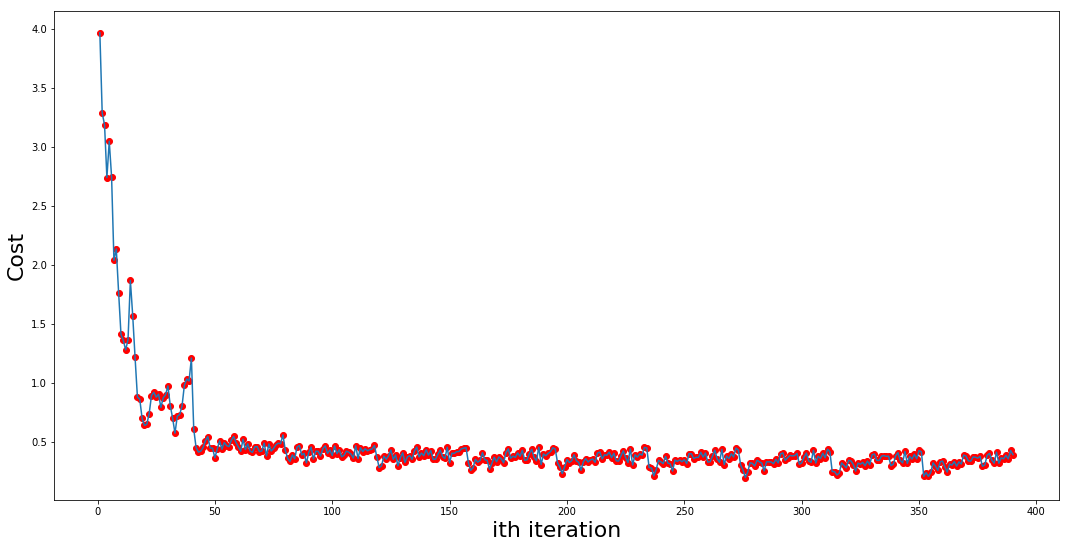

In [10]:
acti_type = ["softmax"]
net1.train(acti_type, 10, 0.006, 1000, 39)
net1.test(acti_type, 1000)